In [1]:
import pandas as pd
import numpy as np

In [2]:
from acquire import github_api_request

In [3]:
# Standard imports for scrpaing
from requests import get
from bs4 import BeautifulSoup
import os



# Used to run selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


In [4]:
from env import github_token, github_username

In [5]:
import sys

sys.path.append('..')

import prepare
from prepare import clean_strings, tokenize, remove_stopwords, stem, lemmatize

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk


In [7]:
url = 'https://github.com/trending?spoken_language_code=en'
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url, headers=headers)


In [8]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)
soup.h3
links = soup.find_all('h2', class_="h3 lh-condensed")
links


[<h2 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":400215964,"originating_url":"https://github.com/trending?spoken_language_code=en","user_id":null}}' data-hydro-click-hmac="ec107ceae8568995e43964ff62b0e50330a4bd1eec0a74e4e3b5165d1ff0756b" data-view-component="true" href="/novuhq/novu">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a.249.2

In [9]:
links[0].a['href']

'/novuhq/novu'

In [10]:
[link.a['href'] for link in links]

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java']

In [11]:
path_list = ['daily', 'weekly', 'monthly']

In [12]:
repo_urls = []

for path in path_list:
    url = f'https://github.com/trending?since={path}&spoken_language_code=en'
    headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
    response = get(url, headers=headers)
    # Make a soup variable holding the response content
    
    soup = BeautifulSoup(response.content, 'html.parser')
    # print(soup)
    soup.h3
    links = soup.find_all('h2', class_="h3 lh-condensed")
    
#     links_dict = {
#         path : [link.a['href'] for link in links]
#     }
    
    
    repo_urls += [link.a['href'] for link in links]

In [13]:
repo_urls

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java',
 '/yt-dlp/yt-dlp',
 '/sei-protocol/sei-chain',
 '/codecrafters-io/build-your-own-x',
 '/immich-app/immich',
 '/SimplifyJobs/Summer2024-Internships',
 '/binhnguyennus/awesome-scalability',
 '/steven2358/awesome-generative-ai',
 '/Z4nzu/hackingtool',
 '/Infisical/infisical',
 '/microsoft/Web-Dev-For-Beginners',
 '/modelscope/modelscope',
 '/poteto

In [14]:
url_df = pd.DataFrame(repo_urls)

In [15]:
url_df.head()


,0
0,/novuhq/novu
1,/ververica/flink-cdc-connectors
2,/Sophia-Community/SophiApp
3,/groue/GRDB.swift
4,/cloud-hypervisor/cloud-hypervisor


In [16]:
url_df.drop_duplicates(inplace=True)


In [17]:
len(url_df)

62

In [18]:
url_df[0].to_list()

['/novuhq/novu',
 '/ververica/flink-cdc-connectors',
 '/Sophia-Community/SophiApp',
 '/groue/GRDB.swift',
 '/cloud-hypervisor/cloud-hypervisor',
 '/BlinkDL/RWKV-LM',
 '/tuist/tuist',
 '/intitni/CopilotForXcode',
 '/openai/whisper',
 '/Mbed-TLS/mbedtls',
 '/dorny/paths-filter',
 '/traefik/traefik',
 '/pimcore/pimcore',
 '/faker-ruby/faker',
 '/prometheus/node_exporter',
 '/microsoft/fluentui-react-native',
 '/AleoHQ/snarkOS',
 '/marqo-ai/marqo',
 '/SimplifyJobs/Summer2024-Internships',
 '/go-sql-driver/mysql',
 '/microsoft/microsoft-ui-xaml',
 '/codecrafters-io/build-your-own-x',
 '/ixartz/Next-js-Boilerplate',
 '/psf/black',
 '/grpc/grpc-java',
 '/yt-dlp/yt-dlp',
 '/sei-protocol/sei-chain',
 '/immich-app/immich',
 '/binhnguyennus/awesome-scalability',
 '/steven2358/awesome-generative-ai',
 '/Z4nzu/hackingtool',
 '/Infisical/infisical',
 '/microsoft/Web-Dev-For-Beginners',
 '/modelscope/modelscope',
 '/poteto/hiring-without-whiteboards',
 '/awesome-selfhosted/awesome-selfhosted',
 '/ope

In [19]:
url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url, headers=headers)


In [20]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)
soup
# links = soup.find_all('div', class_="Box-sc-g0xbh4-0 bBwPjs search-title")
# links

{"payload":{"header_redesign_enabled":false,"results":[{"id":"5131769","archived":false,"color":"#438eff","followers":701,"has_funding_file":false,"hl_name":"eklipse2k8/FilterKit","hl_trunc_description":"iOS Framework for easily adding Camera with Filters","language":"Objective-C","mirror":false,"owned_by_organization":false,"public":true,"repo":{"repository":{"id":5131769,"name":"FilterKit","owner_id":40286,"owner_login":"eklipse2k8","updated_at":"2012-07-23T21:39:31.000Z","has_issues":true}},"sponsorable":false,"topics":[],"type":"Public","help_wanted_issues_count":0,"good_first_issue_issues_count":0,"starred_by_current_user":false},{"id":"1359757","archived":true,"color":"#701516","followers":690,"has_funding_file":false,"hl_name":"SchemaPlus/schema_plus","hl_trunc_description":"SchemaPlus provides a collection of enhancements and extensions to ActiveRecord","language":"Ruby","mirror":false,"owned_by_organization":true,"public":true,"repo":{"repository":{"id":1359757,"name":"schema_

In [21]:
# df['your_column_here'] = df['your_column_here'].apply(lambda string: remove_stopwords(tokenize(basic_clean(string))))
# df.head()

In [22]:
import json

# Specify the path to your JSON file
json_file_path = "data2.json"

# Read the JSON data from the file and load it into a Python dictionary
with open(json_file_path, "r") as json_file:
    df = json.load(json_file)



In [332]:
df = prepare.prepare_data()

In [24]:
df.language.value_counts()

JavaScript                  47
Python                      39
Java                        30
TypeScript                  21
Go                          17
HTML                        16
C++                         15
Jupyter Notebook            11
C                           11
Shell                        9
C#                           5
Ruby                         5
PHP                          5
TeX                          3
Dockerfile                   3
Kotlin                       3
CSS                          3
Scala                        2
Swift                        2
Vue                          2
Groovy                       2
Markdown                     1
AsciiDoc                     1
CoffeeScript                 1
MDX                          1
Pascal                       1
Wikitext                     1
CMake                        1
DIGITAL Command Language     1
SCSS                         1
Batchfile                    1
Objective-C                  1
Dart    

In [25]:
df.language.value_counts().sum()


267

In [26]:
df[df.language.isnull()==True]

,repo,language,readme_contents,clean_text,stem,lemmatize,target


In [27]:
df = prepare.prepare_data()

In [28]:
labels = pd.concat([df.target.value_counts(),
                    df.target.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']

In [29]:
labels

,n,percent
0,181,0.677903
2,47,0.176030
1,39,0.146067


In [30]:
df.tail()

,repo,language,readme_contents,clean_text,stem,lemmatize,target
262,HashLips/hashlips_art_engine,JavaScript,# Welcome to HashLips 👄\n\n![](https://github....,welcome hashlips httpsgithubcomhashlipshashlip...,welcom hashlip httpsgithubcomhashlipshashlipsa...,welcome hashlips httpsgithubcomhashlipshashlip...,2
263,microsoft/vscode-docs,CSS,"<p align=""center"">\n <img alt=""vscode logo"" s...",aligncenter img altvscode logo srcimageslogost...,aligncent img altvscod logo srcimageslogostabl...,aligncenter img altvscode logo srcimageslogost...,0
264,matthieua/WOW,JavaScript,# WOW.js [![Build Status](https://secure.travi...,wowjs build statushttpssecuretravisciorgmatthi...,wowj build statushttpssecuretravisciorgmatthie...,wowjs build statushttpssecuretravisciorgmatthi...,2
265,PHPOffice/PHPExcel,PHP,"# PHPExcel - DEAD\n\nPHPExcel last version, 1....",phpexcel dead phpexcel last version released p...,phpexcel dead phpexcel last version releas pro...,phpexcel dead phpexcel last version released p...,0
266,bradtraversy/vanillawebprojects,JavaScript,# 20+ Web Projects With Vanilla JavaScript\n\n...,web projects vanilla javascript main repositor...,web project vanilla javascript main repositori...,web project vanilla javascript main repository...,2


# Split the data

In [237]:
df, _, _ = prepare.split_data()

In [238]:
# df[df['language'].isna()]
# df.dropna(inplace=True)

# Exploration

In [239]:
python_words = ' '.join(df[df.target == 1]['stem']).split()
js_words = ' '.join(df[df.target == 2]['stem']).split()
other_words = ' '.join(df[df.target == 0]['stem']).split()
all_words = ' '.join(df.stem).split()

In [240]:
len(python_words)

34185

In [241]:
filtered_python_words = [word for word in python_words if len(word) <= 12]
python_words = [word for word in filtered_python_words if len(word) > 1]
python_words = [word for word in python_words if not word.isdigit()]

In [242]:
python_words

['code',
 'style',
 'import',
 'notic',
 'team',
 'maintain',
 'gym',
 'sinc',
 'move',
 'futur',
 'develop',
 'drop',
 'replac',
 'gym',
 'import',
 'gymnasium',
 'gym',
 'gym',
 'receiv',
 'futur',
 'updat',
 'pleas',
 'switch',
 'gymnasium',
 'soon',
 'your',
 'abl',
 'youd',
 'like',
 'read',
 'stori',
 'behind',
 'switch',
 'pleas',
 'check',
 'blog',
 'gym',
 'gym',
 'open',
 'sourc',
 'python',
 'librari',
 'develop',
 'compar',
 'reinforc',
 'learn',
 'algorithm',
 'provid',
 'standard',
 'api',
 'commun',
 'learn',
 'algorithm',
 'environ',
 'well',
 'standard',
 'set',
 'environ',
 'compliant',
 'api',
 'sinc',
 'releas',
 'gym',
 'api',
 'becom',
 'field',
 'standard',
 'gym',
 'document',
 'websit',
 'propos',
 'fix',
 'chang',
 'gym',
 'also',
 'discord',
 'server',
 'develop',
 'purpos',
 'join',
 'instal',
 'instal',
 'base',
 'gym',
 'librari',
 'use',
 'pip',
 'instal',
 'gym',
 'includ',
 'depend',
 'famili',
 'environ',
 'there',
 'massiv',
 'number',
 'problemat',
 

In [243]:
[word for word in python_words if len(word) == 12]

['memoryeffici',
 'trainingtest',
 'cycleconsist',
 'tensorlayera',
 'tensorlayera',
 'mapscyclegan',
 'mapscyclegan',
 'facadestestb',
 'trainingtest',
 'cycleconsist',
 'userfriendli',
 'partofspeech',
 'summaryclick',
 'printhanlpin',
 'tokenizerfit',
 'charleveltru',
 'underperform',
 'parameterfre',
 'evolutionari',
 'texttospeech',
 'texttospeech',
 'datasetsroot',
 'datasetsroot',
 'searchsearch',
 'crosslibrari',
 'preprocessor',
 'userfriendli',
 'tesseractocr',
 'coroutinebas',
 'cryptographi',
 'cryptographi',
 'scienceengin',
 'humanwritten',
 'userfriendli',
 'userinterfac',
 'whitelistbas',
 'xmlhtmlxhtml',
 'instagramlik',
 'effortlessli',
 'activerecord',
 'generatorori',
 'pythonagnost',
 'cheminformat',
 'itchatpython',
 'textreplymsg',
 'textreplymsg',
 'addfriendmsg',
 'textreplymsg',
 'itchatruntru',
 'searchfriend',
 'itchatsendss',
 'exitcallback',
 'itchatlogout',
 'chyrocchyroc',
 'gitterpictur',
 'robotdemofil',
 'liuwonswxbot',
 'zixiawechati',
 'kanjielujeev

In [244]:
len(python_words)

29730

In [245]:
filtered_js_words = [word for word in js_words if len(word) <= 12]
js_words = [word for word in filtered_js_words if len(word) > 1]

In [246]:
js_words = [word for word in js_words if not word.isdigit()]

In [247]:
js_words

['div',
 'aligncent',
 'img',
 'width',
 'height',
 'br',
 'br',
 'npmnpmnpmurl',
 'pr',
 'br',
 'img',
 'img',
 'img',
 'altinstal',
 'size',
 'img',
 'img',
 'img',
 'img',
 'img',
 'hwebpackh',
 'webpack',
 'modul',
 'bundler',
 'main',
 'purpos',
 'bundl',
 'javascript',
 'file',
 'usag',
 'browser',
 'yet',
 'also',
 'capabl',
 'transform',
 'bundl',
 'packag',
 'resourc',
 'asset',
 'div',
 'tabl',
 'content',
 'core',
 'teamcoreteam',
 'premium',
 'backer',
 'gold',
 'silver',
 'bronz',
 'backersback',
 'special',
 'instal',
 'npm',
 'bash',
 'npm',
 'instal',
 'savedev',
 'webpack',
 'instal',
 'yarn',
 'bash',
 'yarn',
 'add',
 'webpack',
 'dev',
 'webpack',
 'bundler',
 'modul',
 'main',
 'purpos',
 'bundl',
 'javascript',
 'file',
 'usag',
 'browser',
 'yet',
 'also',
 'capabl',
 'transform',
 'bundl',
 'packag',
 'resourc',
 'asset',
 'tldr',
 'bundl',
 'es',
 'modul',
 'even',
 'combin',
 'creat',
 'singl',
 'bundl',
 'multipl',
 'chunk',
 'asynchron',
 'load',
 'runtim',


In [248]:
filtered_other_words = [word for word in other_words if len(word) <= 12]
other_words = [word for word in filtered_other_words if len(word) > 1]
other_words = [word for word in other_words if not word.isdigit()]

In [249]:
other_words

['aligncent',
 'img',
 'altclash',
 'width',
 'brclashbr',
 'aligncentera',
 'rulebas',
 'tunnel',
 'goh',
 'aligncent',
 'img',
 'altgithub',
 'action',
 'img',
 'img',
 'img',
 'img',
 'featur',
 'gener',
 'overview',
 'featur',
 'come',
 'clash',
 'inbound',
 'http',
 'http',
 'sock',
 'server',
 'tun',
 'devic',
 'outbound',
 'shadowsocksr',
 'vmess',
 'trojan',
 'snell',
 'sock',
 'http',
 'wireguard',
 'rulebas',
 'rout',
 'dynam',
 'script',
 'domain',
 'ip',
 'address',
 'process',
 'name',
 'fakeip',
 'dn',
 'minimis',
 'impact',
 'dn',
 'pollut',
 'improv',
 'network',
 'perform',
 'transpar',
 'proxi',
 'redirect',
 'tcp',
 'tproxi',
 'tcpudp',
 'automat',
 'rout',
 'tablerul',
 'manag',
 'proxi',
 'group',
 'automat',
 'fallback',
 'load',
 'balanc',
 'latenc',
 'test',
 'remot',
 'provid',
 'load',
 'remot',
 'proxi',
 'list',
 'dynam',
 'rest',
 'api',
 'updat',
 'configur',
 'inplac',
 'via',
 'comprehens',
 'api',
 'featur',
 'may',
 'avail',
 'premium',
 'document',
 '

In [250]:
filtered_all_words = [word for word in all_words if len(word) <= 12]
all_words = [word for word in filtered_all_words if len(word) > 1]
all_words = [word for word in all_words if not word.isdigit()]

In [251]:
len(other_words)

102351

In [252]:
len(filtered_other_words)

102352

In [253]:
# Creates a frequency Series for the words
python_freq = pd.Series(python_words).value_counts()
js_freq = pd.Series(js_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [254]:
js_freq

use            477
icon           458
const          323
javascript     298
softwareoss    281
              ... 
larkina          1
motrix           1
httpftpbt        1
bittorr          1
legal            1
Length: 4213, dtype: int64

In [255]:
len('py2neohttpspy2neoorg')

20

In [256]:
all_freq.head(50)

ye            1749
use           1700
sourc         1459
free          1366
api           1081
python         933
unknown        919
data           901
code           849
file           830
open           760
project        700
build          674
img            674
develop        652
instal         641
apikey         602
manag          600
web            580
user           571
app            568
support        553
servic         517
icon           514
gener          494
applic         493
creat          493
server         488
aligncent      485
run            479
number         468
get            448
window         445
function       429
test           424
mit            416
librari        416
opensourc      414
version        410
javascript     403
see            399
tool           399
set            397
includ         383
provid         382
make           380
platform       375
widthpx        375
document       371
cloud          369
dtype: int64

In [257]:
word_counts = (pd.concat([all_freq, other_freq, js_freq, python_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'js', 'python'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,other,js,python
aa,63,63,0,0
aaa,3,3,0,0
aac,1,1,0,0
aaen,1,1,0,0
aal,4,4,0,0


In [258]:
len('zyszyshttpsgithubcomzyszi')

25

In [259]:
word_counts = word_counts[word_counts['all']>20]
word_counts

,all,other,js,python
aa,63,63,0,0
abstract,24,12,1,11
accept,37,26,7,4
access,237,143,39,55
account,205,112,34,59
...,...,...,...,...
youll,27,17,6,4
your,70,33,29,8
youtub,35,14,9,12
zero,27,17,8,2


In [260]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,other,js,python
ye,1749,5,2,1742
use,1700,1005,477,218
sourc,1459,1359,33,67
free,1366,1262,50,54
api,1081,543,95,443
python,933,302,3,628
unknown,919,4,0,915
data,901,394,83,424
code,849,536,157,156
file,830,534,149,147


In [261]:
pd.concat([word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
            word_counts[word_counts.js == 0].sort_values(by='js').tail(6),
            word_counts[word_counts.other == 0].sort_values(by='other').tail(6)])

,all,other,js,python
iimedium,42,42,0,0
jekyl,36,36,0,0
jenkin,28,28,0,0
kibana,21,21,0,0
helm,22,22,0,0
yarn,46,33,13,0
graphql,51,31,0,20
gym,23,1,0,22
hard,26,23,0,3
headless,25,23,0,2


In [262]:
word_counts_reset = word_counts.reset_index()

# Melt the DataFrame

melted_word_counts = pd.melt(
    word_counts_reset, 
    id_vars=['index'], 
    var_name='language', 
    value_name='count'
)

In [263]:
melted_word_counts = melted_word_counts[melted_word_counts['count']!=0]
melted_word_counts

,index,language,count
0,aa,all,63
1,abstract,all,24
2,accept,all,37
3,access,all,237
4,account,all,205
...,...,...,...
5047,youll,python,4
5048,your,python,8
5049,youtub,python,12
5050,zero,python,2


In [264]:
labels = pd.concat([melted_word_counts.language.value_counts(),
                    melted_word_counts.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
all,1263,0.268895
other,1242,0.264424
python,1105,0.235257
js,1087,0.231424


In [265]:
word_series = pd.Series(all_words)

# Get the value counts of each word
word_counts_list = word_series.value_counts()

# Filter out words that appear only once
filtered_words = word_counts_list[word_counts_list > 10]

In [266]:
filtered_words

ye           1749
use          1700
sourc        1459
free         1366
api          1081
             ... 
concaten       11
gulp           11
placehold      11
leagu          11
simul          11
Length: 1912, dtype: int64

# Visualiztions

Text(0.5, 1.0, 'Proportion of the 20 most common Python words')

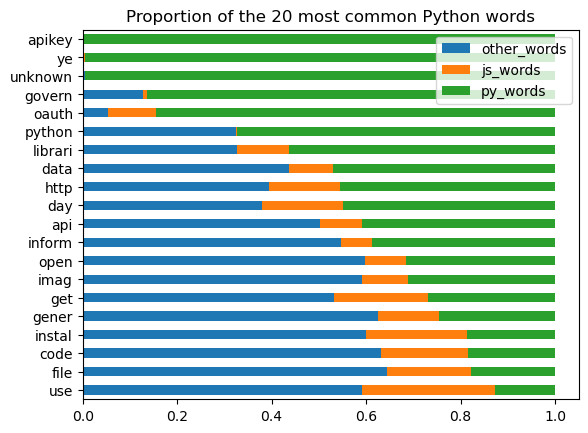

In [267]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='python')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('py_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common Python words')


Text(0.5, 1.0, 'Proportion of the 20 most common JavaScript words')

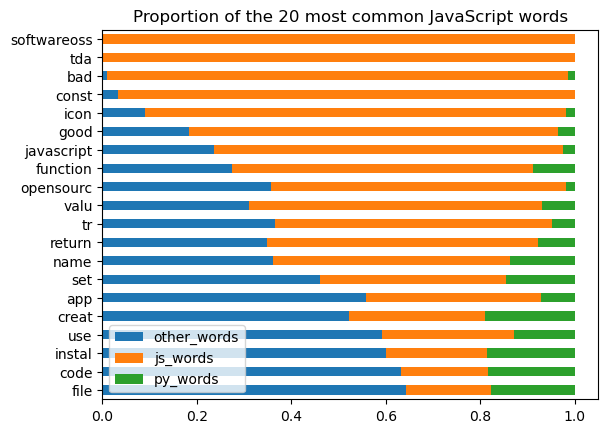

In [268]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='js')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('js_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common JavaScript words')


Text(0.5, 1.0, 'Proportion of the 20 most common Other words')

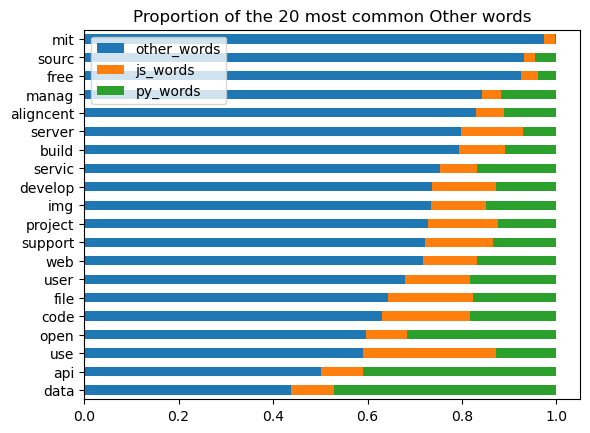

In [269]:
# figure out the percentage of words
(word_counts
 .assign(other_words=word_counts.other / word_counts['all'],
         js_words=word_counts.js / word_counts['all'],
         py_words=word_counts.python / word_counts['all'])
 .sort_values(by='other')
 [['other_words', 'js_words', 'py_words']]
 .tail(20)
 .sort_values('other_words')
 .plot.barh(stacked=True))

plt.title('Proportion of the 20 most common Other words')


In [270]:
python_words

['code',
 'style',
 'import',
 'notic',
 'team',
 'maintain',
 'gym',
 'sinc',
 'move',
 'futur',
 'develop',
 'drop',
 'replac',
 'gym',
 'import',
 'gymnasium',
 'gym',
 'gym',
 'receiv',
 'futur',
 'updat',
 'pleas',
 'switch',
 'gymnasium',
 'soon',
 'your',
 'abl',
 'youd',
 'like',
 'read',
 'stori',
 'behind',
 'switch',
 'pleas',
 'check',
 'blog',
 'gym',
 'gym',
 'open',
 'sourc',
 'python',
 'librari',
 'develop',
 'compar',
 'reinforc',
 'learn',
 'algorithm',
 'provid',
 'standard',
 'api',
 'commun',
 'learn',
 'algorithm',
 'environ',
 'well',
 'standard',
 'set',
 'environ',
 'compliant',
 'api',
 'sinc',
 'releas',
 'gym',
 'api',
 'becom',
 'field',
 'standard',
 'gym',
 'document',
 'websit',
 'propos',
 'fix',
 'chang',
 'gym',
 'also',
 'discord',
 'server',
 'develop',
 'purpos',
 'join',
 'instal',
 'instal',
 'base',
 'gym',
 'librari',
 'use',
 'pip',
 'instal',
 'gym',
 'includ',
 'depend',
 'famili',
 'environ',
 'there',
 'massiv',
 'number',
 'problemat',
 

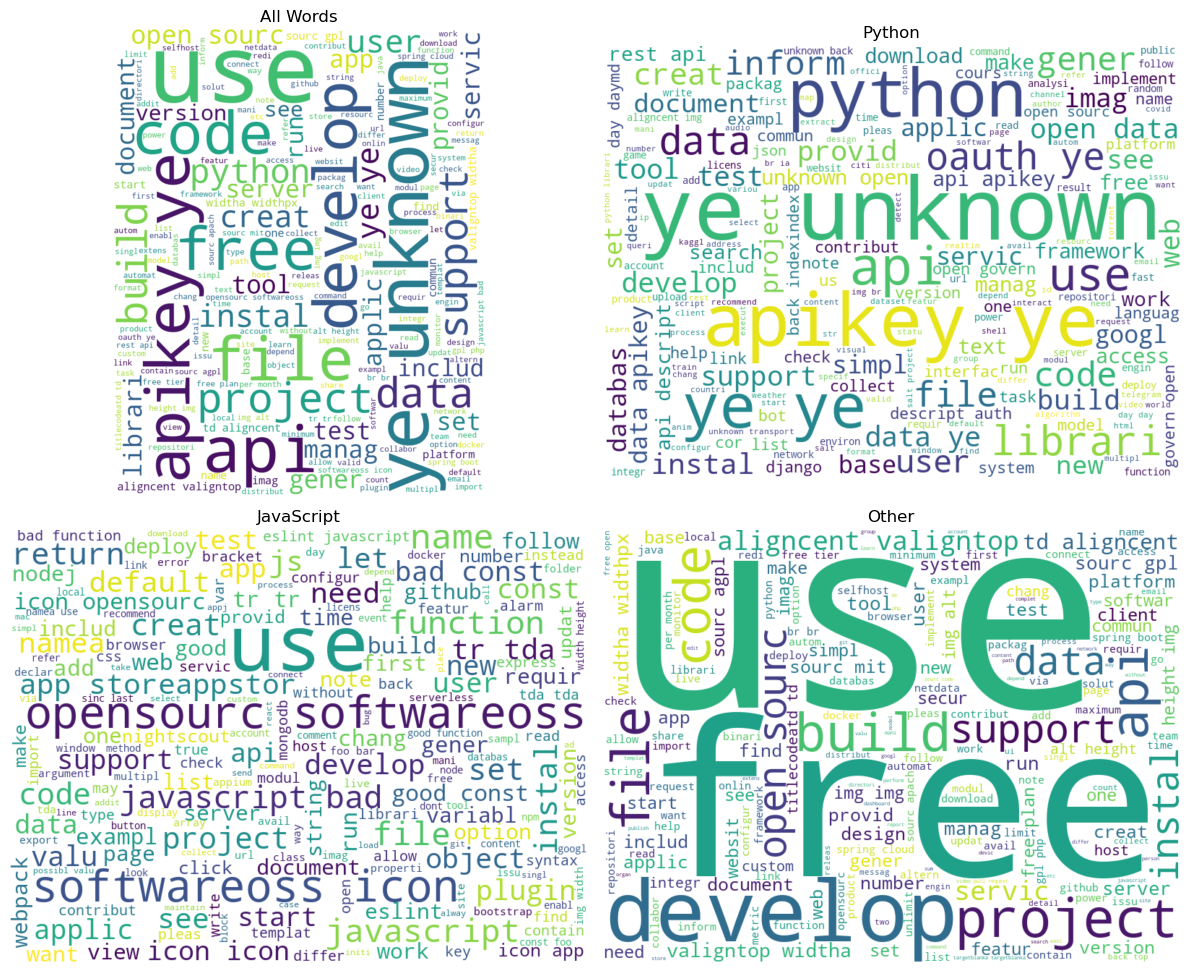

In [271]:

all_cloud = WordCloud(background_color='white', height=1000, width=800).generate(' '.join(all_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))
js_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words))
other_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(other_words))

plt.figure(figsize=(12, 10))

# Create an array of subplots
axs = [
    plt.subplot(2, 2, 1),
    plt.subplot(2, 2, 2),
    plt.subplot(2, 2, 3),
    plt.subplot(2, 2, 4)
]

# Plot each word cloud on a separate subplot
axs[0].imshow(all_cloud, interpolation='bilinear')
axs[1].imshow(python_cloud, interpolation='bilinear')
axs[2].imshow(js_cloud, interpolation='bilinear')
axs[3].imshow(other_cloud, interpolation='bilinear')

# Set titles for each subplot
axs[0].set_title('All Words')
axs[1].set_title('Python')
axs[2].set_title('JavaScript')
axs[3].set_title('Other')

# Turn off axis labels for all subplots
for ax in axs:
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Display the entire plot
plt.show()


In [272]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()


(ye, unknown)    838
(apikey, ye)     576
(ye, ye)         396
(oauth, ye)      146
(data, ye)        79
dtype: int64

In [273]:
top_20_js_bigrams = (pd.Series(nltk.ngrams(js_words, 2))
                      .value_counts()
                      .head(20))

top_20_js_bigrams.head()


(opensourc, softwareoss)    251
(softwareoss, icon)         245
(javascript, bad)           114
(tr, tda)                    84
(app, storeappstor)          82
dtype: int64

In [274]:
top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

top_20_other_bigrams.head()


(open, sourc)             323
(aligncent, valigntop)    289
(td, aligncent)           283
(valigntop, widtha)       283
(widtha, widthpx)         282
dtype: int64

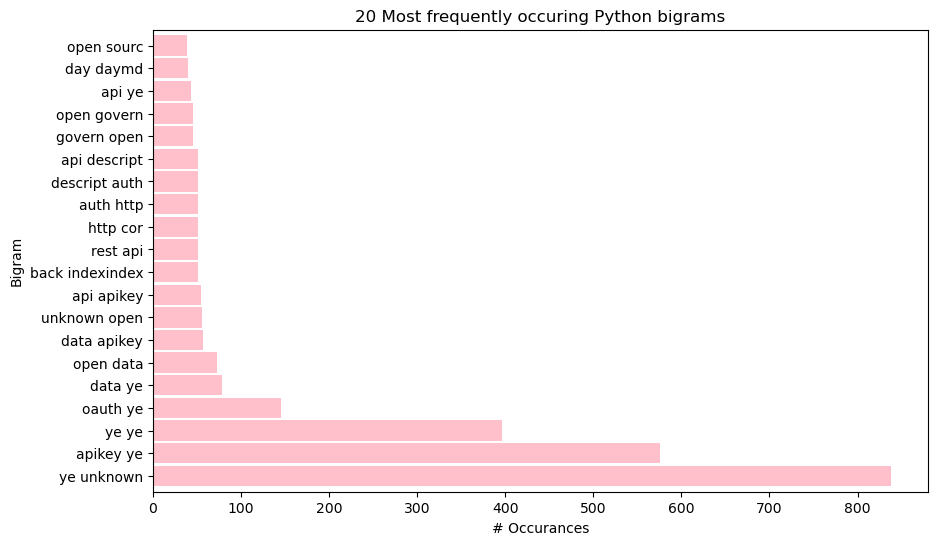

In [275]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


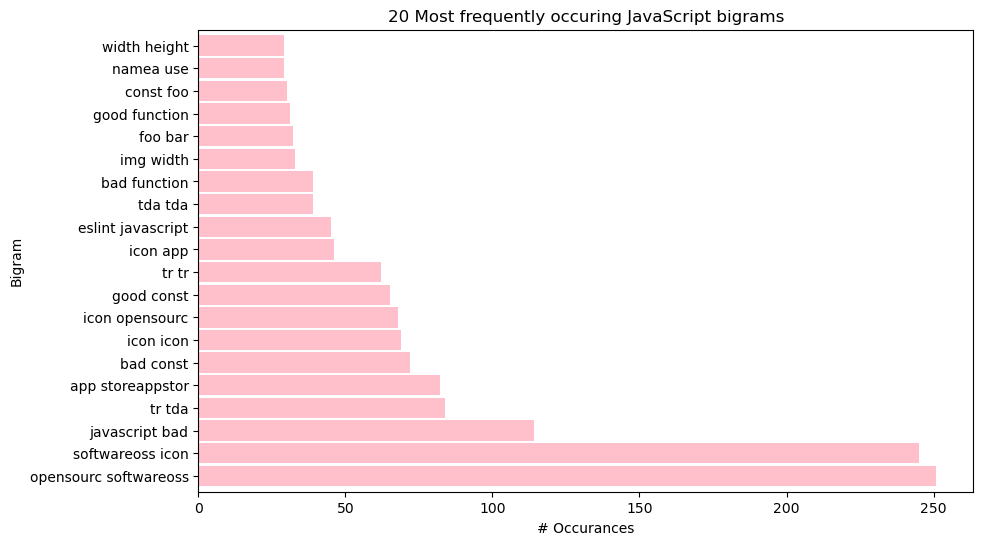

In [276]:
top_20_js_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring JavaScript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


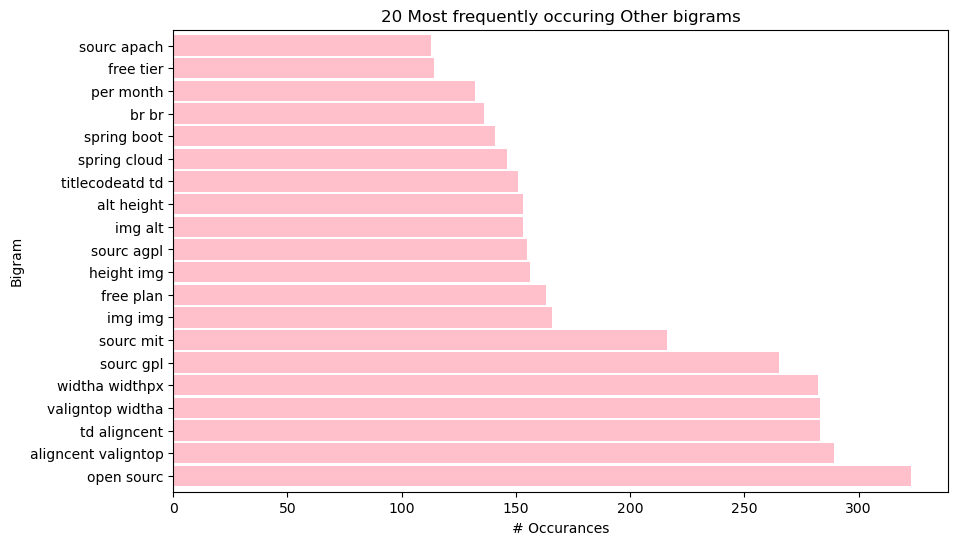

In [277]:
top_20_other_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Other bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


# Bag of Words

In [278]:
data = ' '.join(melted_word_counts['index']).split()


In [279]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(data)

In [280]:
cv.vocabulary_


{'aa': 0,
 'abstract': 1,
 'accept': 2,
 'access': 3,
 'account': 4,
 'across': 5,
 'action': 6,
 'activ': 7,
 'actual': 8,
 'ad': 9,
 'add': 10,
 'addit': 11,
 'address': 12,
 'admin': 13,
 'administr': 14,
 'advanc': 15,
 'age': 16,
 'agent': 17,
 'aggreg': 18,
 'agpl': 19,
 'ai': 20,
 'aim': 21,
 'alarm': 22,
 'alert': 23,
 'algorithm': 24,
 'alibaba': 25,
 'aligncent': 26,
 'alloc': 27,
 'allow': 28,
 'almost': 29,
 'along': 30,
 'alreadi': 31,
 'also': 32,
 'alt': 33,
 'altern': 34,
 'alway': 35,
 'amazon': 36,
 'amount': 37,
 'analysi': 38,
 'analyt': 39,
 'analyz': 40,
 'android': 41,
 'angular': 42,
 'anim': 43,
 'annot': 44,
 'anonym': 45,
 'anoth': 46,
 'answer': 47,
 'anyscal': 48,
 'anyth': 49,
 'apach': 50,
 'api': 51,
 'apikey': 52,
 'app': 53,
 'appium': 54,
 'appj': 55,
 'appl': 56,
 'appli': 57,
 'applic': 58,
 'approach': 59,
 'appropri': 60,
 'architectur': 61,
 'archiv': 62,
 'area': 63,
 'argument': 64,
 'around': 65,
 'array': 66,
 'arraymedium': 67,
 'art': 68,
 

In [281]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [282]:
bow

,aa,abstract,accept,access,account,across,action,activ,actual,ad,...,yarn,ye,year,yet,youd,youll,your,youtub,zero,zip
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [283]:
word_df = bow.apply(lambda row: row / row.sum(), axis=1)
word_df

,aa,abstract,accept,access,account,across,action,activ,actual,ad,...,yarn,ye,year,yet,youd,youll,your,youtub,zero,zip
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [284]:
word_df.sum().max()

4.0

In [285]:
df

,repo,language,readme_contents,clean_text,stem,lemmatize,target
105,openai/gym,Python,[![pre-commit](https://img.shields.io/badge/pr...,precommithttpsimgshieldsiobadgeprecommitenable...,precommithttpsimgshieldsiobadgeprecommitenable...,precommithttpsimgshieldsiobadgeprecommitenable...,1
158,Dreamacro/clash,Go,"<h1 align=""center"">\n <img src=""https://githu...",aligncenter img srchttpsgithubcomdreamacroclas...,aligncent img srchttpsgithubcomdreamacroclashr...,aligncenter img srchttpsgithubcomdreamacroclas...,0
197,pingcap/tidb,Go,"<div align=""center"">\n\n<a href='https://www.p...",div aligncenter hrefhttpswwwpingcapcomutmsourc...,div aligncent hrefhttpswwwpingcapcomutmsourceg...,div aligncenter hrefhttpswwwpingcapcomutmsourc...,0
129,bilibili/ijkplayer,C,# ijkplayer\n\n Platform | Build Status\n ----...,ijkplayer platform build status android build ...,ijkplay platform build statu android build sta...,ijkplayer platform build status android build ...,0
54,iluwatar/java-design-patterns,Java,<!-- the line below needs to be an empty line ...,line needs empty line kramdown isnt smart dear...,line need empti line kramdown isnt smart dearl...,line need empty line kramdown isnt smart dearl...,0
...,...,...,...,...,...,...,...
36,django/django,Python,======\nDjango\n======\n\nDjango is a high-lev...,django django highlevel python web framework e...,django django highlevel python web framework e...,django django highlevel python web framework e...,1
263,microsoft/vscode-docs,CSS,"<p align=""center"">\n <img alt=""vscode logo"" s...",aligncenter img altvscode logo srcimageslogost...,aligncent img altvscod logo srcimageslogostabl...,aligncenter img altvscode logo srcimageslogost...,0
166,ariya/phantomjs,C++,# [PhantomJS](http://phantomjs.org) - Scriptab...,phantomjshttpphantomjsorg scriptable headless ...,phantomjshttpphantomjsorg scriptabl headless w...,phantomjshttpphantomjsorg scriptable headless ...,0
116,fchollet/deep-learning-with-python-notebooks,Jupyter Notebook,"# Companion Jupyter notebooks for the book ""De...",companion jupyter notebooks book deep learning...,companion jupyt notebook book deep learn pytho...,companion jupyter notebook book deep learning ...,0


In [286]:
all_words = pd.DataFrame(all_words)

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': all_words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))


,raw_count,frequency,augmented_frequency
0,,,
ye,1749,0.010869,1.000000
use,1700,0.010565,0.971984
sourc,1459,0.009067,0.834191
free,1366,0.008489,0.781018
api,1081,0.006718,0.618067
...,...,...,...
infix,1,0.000006,0.000572
inflector,1,0.000006,0.000572
influenza,1,0.000006,0.000572


Text(0.5, 1.0, 'IDF for a given word')

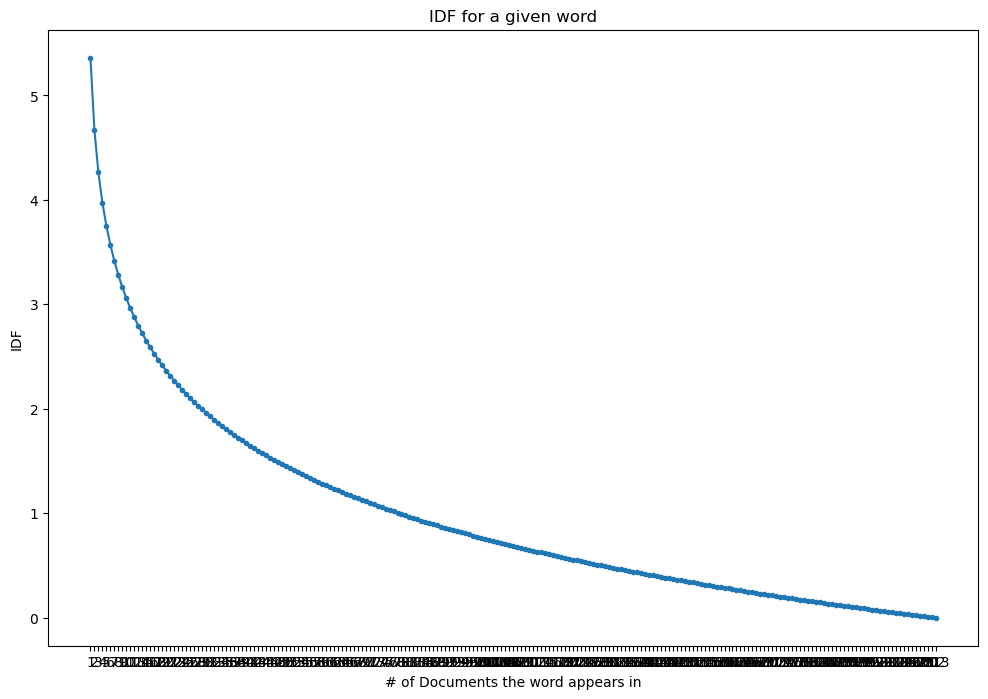

In [288]:
n_documents = len(df)

x = np.arange(1, n_documents + 1)
y = np.log(n_documents / x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Documents the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word')


In [292]:
all_words = pd.DataFrame(all_words)

In [307]:
word_list = all_words[0].to_list()

In [311]:
word_list

['code',
 'style',
 'import',
 'notic',
 'team',
 'maintain',
 'gym',
 'sinc',
 'move',
 'futur',
 'develop',
 'drop',
 'replac',
 'gym',
 'import',
 'gymnasium',
 'gym',
 'gym',
 'receiv',
 'futur',
 'updat',
 'pleas',
 'switch',
 'gymnasium',
 'soon',
 'your',
 'abl',
 'youd',
 'like',
 'read',
 'stori',
 'behind',
 'switch',
 'pleas',
 'check',
 'blog',
 'gym',
 'gym',
 'open',
 'sourc',
 'python',
 'librari',
 'develop',
 'compar',
 'reinforc',
 'learn',
 'algorithm',
 'provid',
 'standard',
 'api',
 'commun',
 'learn',
 'algorithm',
 'environ',
 'well',
 'standard',
 'set',
 'environ',
 'compliant',
 'api',
 'sinc',
 'releas',
 'gym',
 'api',
 'becom',
 'field',
 'standard',
 'gym',
 'document',
 'websit',
 'propos',
 'fix',
 'chang',
 'gym',
 'also',
 'discord',
 'server',
 'develop',
 'purpos',
 'join',
 'instal',
 'instal',
 'base',
 'gym',
 'librari',
 'use',
 'pip',
 'instal',
 'gym',
 'includ',
 'depend',
 'famili',
 'environ',
 'there',
 'massiv',
 'number',
 'problemat',
 

In [323]:
word_list

['code',
 'style',
 'import',
 'notic',
 'team',
 'maintain',
 'gym',
 'sinc',
 'move',
 'futur',
 'develop',
 'drop',
 'replac',
 'gym',
 'import',
 'gymnasium',
 'gym',
 'gym',
 'receiv',
 'futur',
 'updat',
 'pleas',
 'switch',
 'gymnasium',
 'soon',
 'your',
 'abl',
 'youd',
 'like',
 'read',
 'stori',
 'behind',
 'switch',
 'pleas',
 'check',
 'blog',
 'gym',
 'gym',
 'open',
 'sourc',
 'python',
 'librari',
 'develop',
 'compar',
 'reinforc',
 'learn',
 'algorithm',
 'provid',
 'standard',
 'api',
 'commun',
 'learn',
 'algorithm',
 'environ',
 'well',
 'standard',
 'set',
 'environ',
 'compliant',
 'api',
 'sinc',
 'releas',
 'gym',
 'api',
 'becom',
 'field',
 'standard',
 'gym',
 'document',
 'websit',
 'propos',
 'fix',
 'chang',
 'gym',
 'also',
 'discord',
 'server',
 'develop',
 'purpos',
 'join',
 'instal',
 'instal',
 'base',
 'gym',
 'librari',
 'use',
 'pip',
 'instal',
 'gym',
 'includ',
 'depend',
 'famili',
 'environ',
 'there',
 'massiv',
 'number',
 'problemat',
 

In [390]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurrences = sum([1 for doc in documents if word in doc.split()])
    return len(df) / n_occurences

# Get a list of the unique words
unique_words = pd.Series(pd.Series(word_list).unique())
                         
print(unique_words)
                         
# # put the unique words into a data frame
# (pd.DataFrame(dict(word=unique_words))
#  # calculate the idf for each word
#  .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
#  .set_index('word')
#  .sort_values(by='idf', ascending=False)
#  .head())


0               code
1              style
2             import
3              notic
4               team
            ...     
15772           ccsu
15773    altroobafin
15774    altbenjamin
15775           bale
15776         submad
Length: 15777, dtype: object


In [391]:
import pandas as pd

# Replace this with your actual data

# data = {'word_list': ['apple banana', 'banana orange apple', 'grape']}
# df = pd.DataFrame(data)
documents = df.stem
# A simple way to calculate idf for demonstration.
def idf(word):
    n_occurrences = sum([1 for doc in documents if word in doc.split()])
    return n_occurrences / len(documents)

# Get a list of the unique words
unique_words = pd.Series(pd.Series(word_list).unique())
print(unique_words)

# Create a DataFrame with the unique words
unique_words_df = pd.DataFrame({'word': unique_words})
display(unique_words_df)

# Calculate the idf for each word
unique_words_df['idf'] = unique_words_df['word'].apply(lambda word: idf(word))

# Sort the data for presentation purposes
sorted_unique_words_df = unique_words_df.sort_values(by='idf', ascending=False)

# Display the top 5 words based on IDF
top_words_by_idf = sorted_unique_words_df.head(5)
display(top_words_by_idf)


0               code
1              style
2             import
3              notic
4               team
            ...     
15772           ccsu
15773    altroobafin
15774    altbenjamin
15775           bale
15776         submad
Length: 15777, dtype: object


,word
0,code
1,style
2,import
3,notic
4,team
...,...
15772,ccsu
15773,altroobafin
15774,altbenjamin
15775,bale


,word,idf
59,use,0.752809
0,code,0.591760
470,project,0.576779
298,see,0.539326
193,github,0.528090


In [393]:
sorted_unique_words_df.head(10)

,word,idf
59,use,0.752809
0,code,0.591760
470,project,0.576779
298,see,0.539326
193,github,0.528090
10,develop,0.524345
57,instal,0.513109
313,get,0.513109
270,build,0.505618
304,start,0.501873


In [331]:
df

,word_list
0,apple banana
1,banana orange apple
2,grape


In [333]:
df

,repo,language,readme_contents,clean_text,stem,lemmatize,target
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...,0
1,SmartThingsCommunity/SmartThingsPublic,Groovy,# Welcome to the SmartThings Public GitHub Rep...,welcome smartthings public github repo repo co...,welcom smartth public github repo repo contain...,welcome smartthings public github repo repo co...,0
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...,div aligncent img srchttpswwwtensorfloworgimag...,div aligncenter img srchttpswwwtensorfloworgim...,0
3,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...,completepythonbootcamp course files complete p...,completepythonbootcamp cours file complet pyth...,completepythonbootcamp course file complete py...,0
4,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",aligncenter hrefhttpsgetbootstrapcom img srcht...,aligncent hrefhttpsgetbootstrapcom img srchttp...,aligncenter hrefhttpsgetbootstrapcom img srcht...,2
...,...,...,...,...,...,...,...
262,HashLips/hashlips_art_engine,JavaScript,# Welcome to HashLips 👄\n\n![](https://github....,welcome hashlips httpsgithubcomhashlipshashlip...,welcom hashlip httpsgithubcomhashlipshashlipsa...,welcome hashlips httpsgithubcomhashlipshashlip...,2
263,microsoft/vscode-docs,CSS,"<p align=""center"">\n <img alt=""vscode logo"" s...",aligncenter img altvscode logo srcimageslogost...,aligncent img altvscod logo srcimageslogostabl...,aligncenter img altvscode logo srcimageslogost...,0
264,matthieua/WOW,JavaScript,# WOW.js [![Build Status](https://secure.travi...,wowjs build statushttpssecuretravisciorgmatthi...,wowj build statushttpssecuretravisciorgmatthie...,wowjs build statushttpssecuretravisciorgmatthi...,2
265,PHPOffice/PHPExcel,PHP,"# PHPExcel - DEAD\n\nPHPExcel last version, 1....",phpexcel dead phpexcel last version released p...,phpexcel dead phpexcel last version releas pro...,phpexcel dead phpexcel last version released p...,0


In [379]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.stem.to_list())
tfidfs


<267x44262 sparse matrix of type '<class 'numpy.float64'>'
	with 88617 stored elements in Compressed Sparse Row format>

In [380]:
idf_df = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names_out())
idf_df

,aa,aaa,aaaiali,aac,aaen,aakash,aakirahttpstwittercomaakira,aal,aalborg,aan,...,zuulfinchleyhttpswwwfangzhipengcomspringcloudscfzuulhtml,zuulhttpblogcsdnnetforezparticledetail,zuulhttpswwwfangzhipengcomspringcloudsczuulrawhtml,zwave,zxvf,zymiboxpay,zynga,zypper,zyszysgmailcom,zyszyshttpsgithubcomzyszi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.085037,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:
idf_df.licens

0      0.000000
1      0.000000
2      0.025314
3      0.000000
4      0.010681
         ...   
262    0.000000
263    0.000000
264    0.149670
265    0.125193
266    0.000000
Name: licens, Length: 267, dtype: float64

In [389]:
idf_df.max().sort_values(ascending=False).head(20)


cncremasteredcollect                           1.000000
packagesnextreadmemd                           1.000000
httpslabuladonggithubioarticlefnamehtmlfnam    0.971006
contenthellogithubmd                           0.959338
mantchshttpsgithubcomnlplov                    0.946287
hehim                                          0.921568
salt                                           0.899467
live                                           0.882241
netdata                                        0.880259
jenkin                                         0.878757
tda                                            0.876309
tidb                                           0.875972
bigbluebutton                                  0.864212
keycloak                                       0.850161
tesseract                                      0.846066
anbspnbspa                                     0.842533
appium                                         0.842284
bracket                                        0

In [397]:
import scipy.stats as stats
from scipy.stats import f_oneway

In [398]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(python_unique_words, javascript_unique_words, other_unique_words)

# Interpret the results
if p_value < 0.05:
    print("There are significant differences in the mean number of unique words among different programming languages.")
else:
    print("There are no significant differences in the mean number of unique words among different programming languages.")

NameError: name 'python_unique_words' is not defined